**Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.**

**Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.**

**Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?**

**Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?**

**Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?**

**Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?**

In [21]:
import pandas as pd

In [22]:
data = pd.read_csv('winequality-red.csv')

In [28]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**ANSWER 2**

In [24]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**ANSWER 3 & 4**

In [59]:
import seaborn as sns

In [64]:
data2 = pd.read_csv("StudentsPerformance.csv")

In [65]:
data2['gender'] = data2['gender'].map({"female":1,"male":2})
data2['race/ethnicity'] = data2['race/ethnicity'].map({'group B':2, 'group C':3, 'group A':1, 'group D':4, 'group E':5})
data2['parental level of education'] = data2['parental level of education'].map({"bachelor's degree":1, 'some college':2, "master's degree":3,
       "associate's degree":4, 'high school':5, 'some high school':6})
data2['lunch'] = data2['lunch'].map({'standard':1, 'free/reduced':2})
data2['test preparation course'] = data2['test preparation course'].map({'none':1, 'completed':2})

In [66]:
data2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,2,1,1,1,72,72,74
1,1,3,2,1,2,69,90,88
2,1,2,3,1,1,90,95,93
3,2,1,4,2,1,47,57,44
4,2,3,2,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,1,5,3,1,2,88,99,95
996,2,3,5,2,1,62,55,55
997,1,3,5,2,2,59,71,65
998,1,4,2,1,2,68,78,77


<AxesSubplot:>

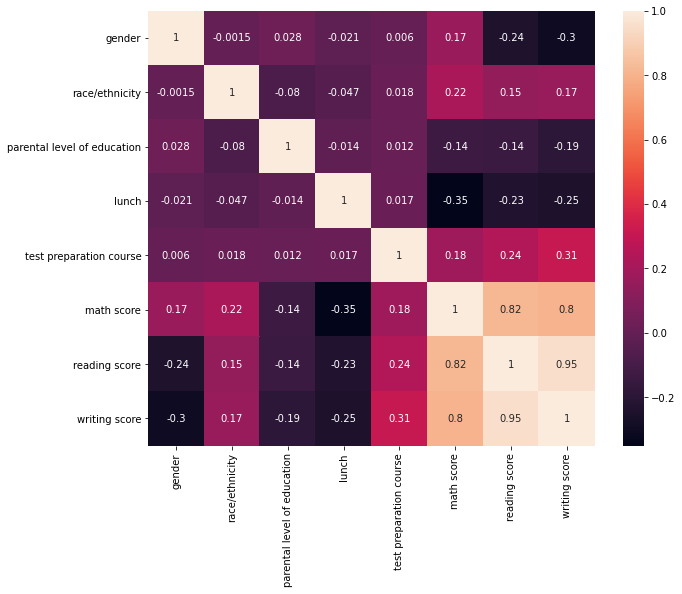

In [69]:
plt.figure(figsize=(10,8))
sns.heatmap(data2.corr(), annot=True)

**ANSWER 5**

In [107]:
data2 = pd.read_csv("StudentsPerformance.csv")

In [92]:
data2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:xlabel='math score', ylabel='Density'>

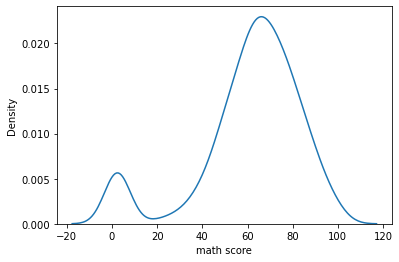

In [100]:
sns.kdeplot(data2['math score'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

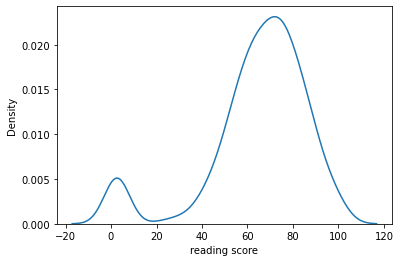

In [98]:
sns.kdeplot(data2['reading score'])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

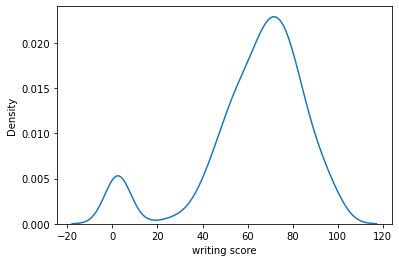

In [99]:
sns.kdeplot(data2['writing score'])

In [106]:
import numpy as np
for i in data2['math score']:
    data2.loc[i, 'math score'] = (data2['math score'].mean() - data2.loc[i, 'math score']) / np.std(data2['math score'])
for i in data2['reading score']:
    data2.loc[i, 'reading score'] = (data2['reading score'].mean() - data2.loc[i, 'reading score']) / np.std(data2['reading score'])
for i in data2['writing score']:
    data2.loc[i, 'writing score'] = (data2['writing score'].mean() - data2.loc[i, 'writing score']) / np.std(data2['writing score'])
    #data2['math score'][i] = (data2['math score'].mean() - data2['math score'][i]) / np.std(data2['math score'])

KeyError: -0.41283279099575426

In [97]:
data2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,-0.412833,72.0,74.0
1,female,group C,some college,standard,completed,69.000000,90.0,88.0
2,female,group B,master's degree,standard,none,90.000000,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.000000,57.0,44.0
4,male,group C,some college,standard,none,76.000000,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.000000,99.0,95.0
996,male,group C,high school,free/reduced,none,62.000000,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.000000,71.0,65.0
998,female,group D,some college,standard,completed,68.000000,78.0,77.0


**ANSWER 6**

In [103]:
from sklearn.decomposition import PCA

In [108]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming you have already loaded and preprocessed your wine quality dataset
# X represents the feature matrix

# Apply PCA
pca = PCA()
pca.fit(data)

# Calculate explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the minimum number of principal components to explain 90% variance
n_components = np.argmax(cumulative_variance >= 0.9) + 1

print("Minimum number of principal components to explain 90% variance:", n_components)


Minimum number of principal components to explain 90% variance: 1
